In [1]:
import sys
import os
import random
import cv2
import matplotlib.pyplot as plt
import numpy as np
print(sys.executable)

/home/pardusumsu/code/dataset-collector/venv/bin/python


In [2]:
def get_img_path(dir_path):
    img_path = [] 
    for dirpath, dirnames, filenames in os.walk(dir_path):
        filenum = 0
        for file in filenames:
            if file.endswith(".jpg") or file.endswith(".png") or file.endswith(".jpeg"):
                img_path.append(os.path.join(dirpath, file))
                filenum = filenum + 1
        print(f"There are {len(dirnames)} directories and {filenum} images in '{dirpath}'.")
        
    return img_path

In [3]:
img_path = get_img_path("datasets")
print(img_path)

There are 1 directories and 0 images in 'datasets'.
There are 3 directories and 0 images in 'datasets/kaggle-drone'.
There are 0 directories and 40 images in 'datasets/kaggle-drone/test'.
There are 0 directories and 537 images in 'datasets/kaggle-drone/pos_images'.
There are 2 directories and 0 images in 'datasets/kaggle-drone/drones_dataset'.
There are 0 directories and 349 images in 'datasets/kaggle-drone/drones_dataset/train'.
There are 0 directories and 148 images in 'datasets/kaggle-drone/drones_dataset/validation'.
['datasets/kaggle-drone/test/test40.jpg', 'datasets/kaggle-drone/test/test19.jpg', 'datasets/kaggle-drone/test/test20.jpg', 'datasets/kaggle-drone/test/test5.jpg', 'datasets/kaggle-drone/test/test9.jpg', 'datasets/kaggle-drone/test/test7.jpg', 'datasets/kaggle-drone/test/test38.jpg', 'datasets/kaggle-drone/test/test16.jpg', 'datasets/kaggle-drone/test/test24.jpg', 'datasets/kaggle-drone/test/test35.jpg', 'datasets/kaggle-drone/test/test23.jpg', 'datasets/kaggle-drone/t

In [17]:
def store_pos_images(imgs_path, dataset_name):
    if not os.path.exists(f"datasets/{dataset_name}/pos_images"):
        os.makedirs(f"datasets/{dataset_name}/pos_images")
    
    for i, img in enumerate(imgs_path):
        try:
            if i % 10 == 0:
                print(img)
            img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
            resized_img = cv2.resize(img, (100, 100))
            cv2.imwrite(f"datasets/{dataset_name}/pos_images/{i}.jpg", resized_img)
        except Exception as e:
            print(e)

In [20]:
store_pos_images(img_path, "kaggle-drone")

datasets/kaggle-drone/test/test40.jpg
datasets/kaggle-drone/test/test23.jpg
datasets/kaggle-drone/test/test29.jpg
datasets/kaggle-drone/test/test11.jpg
datasets/kaggle-drone/drones_dataset/train/136.jpg
datasets/kaggle-drone/drones_dataset/train/115.jpg
datasets/kaggle-drone/drones_dataset/train/131.jpg
datasets/kaggle-drone/drones_dataset/train/222.jpg
datasets/kaggle-drone/drones_dataset/train/246.jpg
datasets/kaggle-drone/drones_dataset/train/275.jpg
datasets/kaggle-drone/drones_dataset/train/21.jpg
datasets/kaggle-drone/drones_dataset/train/24.jpg
datasets/kaggle-drone/drones_dataset/train/328.jpg
datasets/kaggle-drone/drones_dataset/train/340.jpg
datasets/kaggle-drone/drones_dataset/train/62.jpg
datasets/kaggle-drone/drones_dataset/train/232.jpg
datasets/kaggle-drone/drones_dataset/train/296.jpg
datasets/kaggle-drone/drones_dataset/train/165.jpg
datasets/kaggle-drone/drones_dataset/train/323.jpg
datasets/kaggle-drone/drones_dataset/train/164.jpg
datasets/kaggle-drone/drones_datase

In [17]:
def show_rand_imgs(path, figsize):
    row, col = figsize
    fig = plt.figure(figsize=figsize)
    paths = []
    for file_name in os.listdir(path):
        paths.append(os.path.join(path, file_name))
    for i in range(1, row*col + 1):
        num = random.randint(0, len(paths))
        fig.add_subplot(row, col, i)
        img = cv2.imread(paths[num])
        img_float = img.astype(np.float32) / 255.0
        plt.imshow(img_float, cmap="gray")
        plt.title(paths[num].split('/')[-1])
        plt.axis('off')

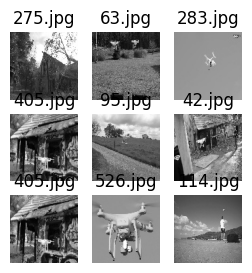

In [18]:
show_rand_imgs("datasets/kaggle-drone/pos_images", (3, 3))